In [1]:
! pip install --user opencv-python



In [2]:
pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


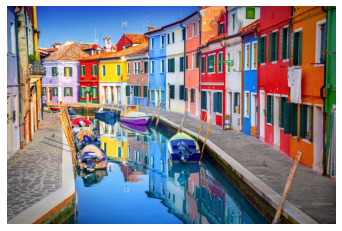

In [3]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

img_path = 'colorpic.jpg'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [5]:
csv = pd.read_csv('colors.csv', names=index, header=None)
index = ["color", "color_name", "hex", "R", "G", "B"]
csv.head

<bound method NDFrame.head of                     color             color_name      hex    R    G    B
0      air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
1     air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
2    air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
3         alabama_crimson        Alabama Crimson  #a32638  163   38   56
4              alice_blue             Alice Blue  #f0f8ff  240  248  255
..                    ...                    ...      ...  ...  ...  ...
860         yellow_orange          Yellow Orange  #ffae42  255  174   66
861        yellow_process       Yellow (Process)  #ffef00  255  239    0
862            yellow_ryb           Yellow (Ryb)  #fefe33  254  254   51
863                zaffre                 Zaffre  #0014a8    0   20  168
864     zinnwaldite_brown      Zinnwaldite Brown  #2c1608   44   22    8

[865 rows x 6 columns]>

In [ ]:


# Declaring global variables
clicked = False

r = g = b = x_pos = y_pos = 0


# Convert csv columns to numpy arrays for better performance
csv_colors = csv[['R', 'G', 'B']].values
csv_color_names = csv['color_name'].values

# Function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    color_distances = np.abs(csv_colors - [R, G, B]).sum(axis=1)
    closest_color_index = np.argmin(color_distances)
    return csv_color_names[closest_color_index]

# Function to get x, y coordinates of mouse double click
def draw_function(event, x, y, flags, param):
    global b, g, r, x_pos, y_pos, clicked
    if event == cv2.EVENT_LBUTTONDBLCLK:
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

while True:
    cv2.imshow("image", img)
    if clicked:
        cv2.rectangle(img, (20, 20), (750, 60), (int(b), int(g), int(r)), -1)
        text = get_color_name(int(r), int(g), int(b)) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2, cv2.LINE_AA)
        clicked = False
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()


C:\Users\zeineb\AppData\Local\Temp\ipykernel_83092\2673907511.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
  if r + g + b >= 600:
